# Practical work 02 - Dousse, Elmerchichi, Magne
## Exercice 1 : Get the data 
Get and read the data from lausanne-appart.xlsx.

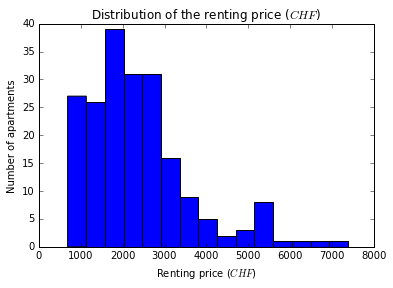

In [7]:
"""
    Practical work N°: 2 Linear Regression
    Student names: 
        + Dousse Kewin
        + El Merchichi Mouad
        + Magne Gabriel
    
    Exercise 1
"""
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data from 'lausanne-appart.xlsx' file. Parse the columns living area = 'A' and renting price = 'C'
dataframe = pd.read_excel('lausanne-appart.xlsx', sheetname=0,  header=None, skiprows=1, parse_cols=[0, 2], convert_float=False)

# extract each column into separate vectors
living_areas = dataframe[0].values
renting_prices = dataframe[1].values

# visualize the distribution of the renting price
plt.hist(renting_prices, bins='auto')
plt.title('Distribution of the renting price ($CHF$)')
plt.xlabel('Renting price ($CHF$)')
plt.ylabel('Number of apartments')
plt.figure()
plt.show()

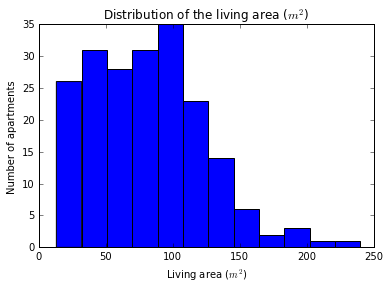

In [8]:
# visualize the distribution of the living area
plt.hist(living_areas, bins='auto')
plt.title('Distribution of the living area ($m^2$)')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Number of apartments')
plt.figure()
plt.show()

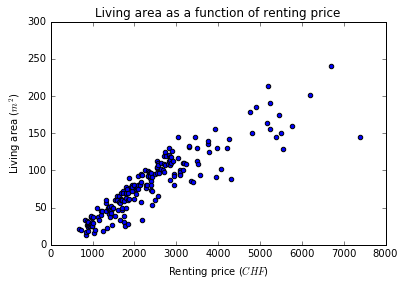

In [9]:
# scatter plot of renting price as a function of living area
plt.scatter(renting_prices, living_areas)
plt.title('Living area as a function of renting price')
plt.ylabel('Living area ($m^2$)')
plt.xlabel('Renting price ($CHF$)')
plt.show()

## Exercice 2: Normal equations for linear regression
Implement the linear regression on the scatter plot from exercice 1.

NB : Everything from this exercice and the next ones ar plottes on the final graph.

In [12]:
from numpy.linalg import inv
from numpy import matmul
from sys import float_info

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
import random as rnd

# extract living_area and renting_price from excel sheet
dataframe = pd.read_excel('lausanne-appart.xlsx', sheetname=0, header=None, skiprows=1, parse_cols=[0, 2], convert_float=False)
living_areas = dataframe[0].values
renting_prices = dataframe[1].values
N = living_areas.size

# create a vector of the same size as 'living_areas' vector and then fill it of 1s
ones = np.ones(N)

# Stack the two vectors (ones and living_areas) in sequence vertically and
# reshape them so they become a matrix with dimensions (living_areas.size, 2)
# using Fortran-like index order
X = np.vstack((ones, living_areas)).reshape((-1,), order='F').reshape((N, 2))

# ++++++++++++++++++ Exercise 2: Using normal equations for linear regression ++++++++++++++++++

# Apply the closed form solution. see equation (3)
theta = matmul(matmul(inv(matmul(X.T, X)), X.T), renting_prices)

# construct the polynom with the calculated coefficients. 
# Notice that we rotated the vector [theta0, theta1] by one position using numpy.roll() function. 
# Thus the vector becomes [theta1, theta0] to fit the order of coefficients required by numpy.ploy1d()
h = np.poly1d(np.roll(theta, 1))
xUnseen = np.linspace(np.min(living_areas), np.max(living_areas), 300)
yUnseen = h(xUnseen)

## Exercice 3: Batch gradient descent for linear regression
Use batch gradient descent for the same problem.

In [13]:
# ++++++++++++++++++ Exercise 3: Using batch gradient descent for linear regression ++++++++++++

epsilon = .5e-9
alpha = .1e-6
inv_N = 1./N
old_theta = [float_info.max, float_info.max]
theta = [0., 0.]
while (abs(old_theta[0] - theta[0]) > epsilon) and (abs(old_theta[1] - theta[1]) > epsilon):
    old_theta = cp.copy(theta)
    theta -= alpha * inv_N * np.sum(np.subtract(matmul(X, theta), renting_prices).reshape((N, 1)) * X)
        
h = np.poly1d(np.roll(theta, 1))
xUnseen_prime = np.linspace(np.min(living_areas), np.max(living_areas), 300)
yUnseen_prime = h(xUnseen_prime)

## Exercice 4: Stochastic gradient descent for linear regression
Implement the stochastic gradient descent algorithm for the previous problem.

In [14]:
# ++++++++++++++++++ Exercise 4: Using stochastic gradient descent for linear regression +++++++

old_theta = [float_info.max, float_info.max]
theta = [0., 0.]
nb_iter = 1L
while (abs(old_theta[0] - theta[0]) > epsilon) and (abs(old_theta[1] - theta[1]) > epsilon):
    old_theta = cp.copy(theta)
    idx = rnd.randint(0, N - 1)
    theta -= alpha * np.subtract(matmul(X[idx], theta), renting_prices[idx]) * X[idx]
    nb_iter += 1
    
h = np.poly1d(np.roll(theta, 1))
xUnseen_second = np.linspace(np.min(living_areas), np.max(living_areas), 300)
yUnseen_second = h(xUnseen_second)

print "### Number of iterations needed to reach convergence (stochastic algorithm): %d" % nb_iter

### Number of iterations needed to reach convergence (stochastic algorithm): 206595


## Exercice 5: Optional – Mini-batch gradient descent for linear regression
Implement the mini-batch gradient descent algorithm for the previous problem, adding a parameter
b defining the size of the mini-batch. Check that when b = N, you fall back on the
batch gradient descent solution, and when b = 1, you get the behaviour of stochastic gradient
descent.

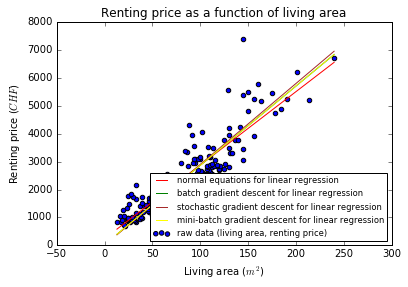

In [15]:
# ++++++++++++++++++ Exercise 5: Using mini-batch gradient descent for linear regression +++++++

old_theta = [float_info.max, float_info.max]
theta = [0., 0.]
b = 100
while (abs(old_theta[0] - theta[0]) > epsilon) and (abs(old_theta[1] - theta[1]) > epsilon):
    old_theta = cp.copy(theta)
    rnd_idxes = rnd.sample(xrange(N), b)
    x_samples = [ X[idx] for idx in rnd_idxes ]
    y_samples = [ renting_prices[idx] for idx in rnd_idxes ]
    theta -= alpha * inv_N * np.sum(np.subtract(matmul(x_samples, theta), y_samples).reshape((b, 1)) * x_samples)
    
h = np.poly1d(np.roll(theta, 1))
xUnseen_third = np.linspace(np.min(living_areas), np.max(living_areas), 300)
yUnseen_third = h(xUnseen_third)

# set the plot parameters
plt.plot(xUnseen, yUnseen, color='red', label='normal equations for linear regression')
plt.plot(xUnseen_prime, yUnseen_prime, color='green', label='batch gradient descent for linear regression')
plt.plot(xUnseen_second, yUnseen_second, color='brown', label='stochastic gradient descent for linear regression')
plt.plot(xUnseen_third, yUnseen_third, color='yellow', label='mini-batch gradient descent for linear regression')
plt.scatter(living_areas, renting_prices, label='raw data (living area, renting price)')
plt.title('Renting price as a function of living area')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Renting price ($CHF$)')
plt.legend(loc='lower right', fontsize='small')

# display the scatter plot
plt.show()